In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# df = pd.read_clipboard()

In [3]:
# df.head()

In [4]:
# df.to_csv('movies.csv')

In [5]:
df = pd.read_excel('Movies_GS.xlsx')
df.head()

,User,Movie,Rating
0,Alexandra,Travellers,3
1,Pavel,Green Book,5
2,Alexandra,Dark,4
3,Kristian,Parasite,5
4,Kristian,Green Book,5


In [6]:
df2 = pd.read_csv('movies.csv')
df2 = df2.set_index('User')
df2.head()

,Movie,Rating
User,,
Alexandra,Travellers,3
Pavel,Green Book,5
Alexandra,Dark,4
Kristian,Parasite,5
Kristian,Green Book,5


In [7]:
R = df2.pivot_table(values='Rating', columns='Movie', index='User')

<AxesSubplot:xlabel='Movie', ylabel='User'>

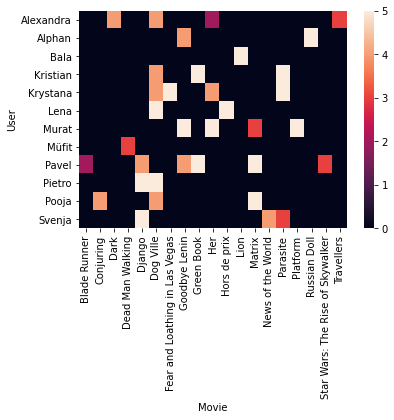

In [8]:
sns.heatmap(R.fillna(0))

In [9]:
df.set_index(['User', 'Movie']).unstack()['Rating']

Movie,Blade Runner,Conjuring,Dark,Dead Man Walking,Django,Dog Ville,Fear and Loathing in Las Vegas,Goodbye Lenin,Green Book,Her,Hors de prix,Lion,Matrix,News of the World,Parasite,Platform,Russian Doll,Star Wars: The Rise of Skywalker,Travellers
User,,,,,,,,,,,,,,,,,,,
Alexandra,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Alphan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
Bala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kristian,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
Krystana,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
Lena,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN
Müfit,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pavel,2.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN


### 1. What is the best movie in the dataset?

In [10]:
# average score
df.groupby('Movie')['Rating'].mean().sort_values(ascending=False).head(10)

Movie
Russian Doll                      5.000000
Platform                          5.000000
Lion                              5.000000
Hors de prix                      5.000000
Green Book                        5.000000
Fear and Loathing in Las Vegas    5.000000
Django                            4.666667
Parasite                          4.333333
Matrix                            4.333333
Goodbye Lenin                     4.333333
Name: Rating, dtype: float64

### 1.1 weighted rating function

$WR = \frac{Rv+Cm}{v+m}$

for a given movie where:

* R : average rating
* v : number of votes
* C : constant (smallest rating)
* m : threshold (votes necessary to reach R/2)

In [11]:
m = 100.0

(5.0 * 100000 + 1.0 * m) / (100000 + m)

4.996003996003996

In [12]:
(5.0 * 10 + 1.0 * m) / (10 + m)

1.3636363636363635

In [13]:
m = 2.0
C = 1.0
avg = df.groupby('Movie')['Rating'].mean()
votes = df.groupby('Movie')['Rating'].count()

a = pd.DataFrame({'avg':avg, 'votes':votes})

In [14]:
wr = (a['avg'] * a['votes'] + 1.0 * m) / (a['votes'] + m)
wr.sort_values(ascending=False)

Movie
Dog Ville                           3.500000
Django                              3.200000
Parasite                            3.000000
Matrix                              3.000000
Green Book                          3.000000
Goodbye Lenin                       3.000000
Her                                 2.600000
Russian Doll                        2.333333
Platform                            2.333333
Lion                                2.333333
Hors de prix                        2.333333
Fear and Loathing in Las Vegas      2.333333
Dark                                2.000000
News of the World                   2.000000
Conjuring                           2.000000
Travellers                          1.666667
Dead Man Walking                    1.666667
Star Wars: The Rise of Skywalker    1.666667
Blade Runner                        1.333333
dtype: float64

### 2. Cosine Similarity

In [15]:
import numpy as np
from scipy.spatial import distance

def cosim(x, y):
    num = np.sum(x*y)
    xsum = np.sqrt(np.sum(x*x))
    ysum = np.sqrt(np.sum(y*y))
    return num / (xsum*ysum)

x = np.array([2, 1, 1, 1, 1])
y = np.array([5, 4, 5, 4, 4])

solution = 1-distance.cosine(x, y)
print(cosim(x, y))
assert np.round(cosim(x, y), 2) == np.round(solution, 2)

0.9642857142857142


In [16]:
cosim(R.loc['Pietro'], R.loc['Krystana'])

0.3123475237772121

In [17]:
cosim(R.loc['Pietro'], R.loc['Svenja'])

0.49999999999999994

In [18]:
cosim(R.loc['Pietro'], R.loc['Kristian'])

0.34815531191139565

### Matrix Factorization

In [19]:
from sklearn.decomposition import NMF

In [20]:
X = R.fillna(3.0) # !!! Surprise does a better job handling NaN

In [21]:
model = NMF(n_components=3, max_iter=1000) # <-- arbitrary number, in the project try 20
model.fit(X)

NMF(max_iter=1000, n_components=3)

In [22]:
user = X.loc[['Pietro']]
profile = model.transform(user) # --> strengths of the 3 hidden features ("genres")
profile

array([[1.91201171, 0.00505895, 1.07657588]])

In [23]:
model.components_.shape # this is Q or P

(3, 19)

In [24]:
X.shape # 12 users, 19 movies

(12, 19)

In [25]:
# approximate the reconstructed matrix for this user
movie_preds = np.dot(profile, model.components_)
movie_preds.round(2)   # centered around 3.0

array([[2.95, 3.19, 3.2 , 3.05, 3.77, 4.27, 3.19, 2.81, 3.54, 2.62, 3.39,
        3.17, 3.53, 3.17, 3.47, 2.7 , 3.06, 3.05, 3.05]])

In [26]:
movies = list(R.columns)
movies[movie_preds.argmax()]

'Dog Ville'

In [27]:
s = pd.Series(movie_preds[0], index=movies)
s.sort_values(ascending=False)

Dog Ville                           4.271257
Django                              3.766613
Green Book                          3.536309
Matrix                              3.526349
Parasite                            3.468986
Hors de prix                        3.393086
Dark                                3.201545
Conjuring                           3.187496
Fear and Loathing in Las Vegas      3.187194
News of the World                   3.166489
Lion                                3.166251
Russian Doll                        3.055924
Travellers                          3.051628
Dead Man Walking                    3.051628
Star Wars: The Rise of Skywalker    3.051628
Blade Runner                        2.950136
Goodbye Lenin                       2.806853
Platform                            2.703213
Her                                 2.621078
dtype: float64